In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_path = "../data/parsed_data.csv"
df = pd.read_csv(csv_path, sep=";")
df = df[df["benchmark"] != "MnistGraph"]
df = df.fillna(0)

In [3]:
def select_outcome(row):
    if row["CRASH_ILLEGAL_INST"] == 1:
        return "Illegal instruction"
    if row["timeout"] == 1:
        return "Timeout"
    if row["SDC"] == 1:
        return "SDC"
    if row["unicode"] == 1:
        return "SDK exception"
    if row["CRASH_MEM"] == 1:
        return "Memory error"
    if row["CRASH_RUNNER"] == 1:
        return "Runtime error"
    return "Not an error"

df["outcome"] = df.apply(select_outcome, axis="columns")

In [4]:
BENCHMARKS = {
    'Fir': "FIR",
    'MatrixAdd': "M. Add",
    'BilinearResize': "B. Resize",
    'MatMult': "M. Mul",
    'Mnist': "MNIST",
}
df["benchmark"] = df["benchmark"].apply(lambda x: BENCHMARKS[x])

In [5]:
df

stdout  stderr  timeout  unicode  runtime  SDC  benchmark machine  \
0          1       1        1        0        0    1  B. Resize    GAP8   
1          1       1        1        0        0    1  B. Resize    GAP8   
2          1       1        1        0        0    1  B. Resize    GAP8   
3          0       0        0        0        0    0  B. Resize    GAP8   
4          0       0        0        0        0    0  B. Resize    GAP8   
...      ...     ...      ...      ...      ...  ...        ...     ...   
1049       0       1        1        0        0    0     M. Add    GAP8   
1050       0       1        1        0        0    0     M. Add    GAP8   
1051       0       1        1        0        0    0     M. Add    GAP8   
1052       0       1        1        0        0    0     M. Add    GAP8   
1053       0       1        1        0        0    0     M. Add    GAP8   

                   header               time  ...  iteration_time  \
0     GAP8_BilinearResize  29-03-22 23:43:17  ...         50.0468   
1     GAP8_BilinearResize  29-03-22 23:50:02  ...         50.0474   
2     GAP8_BilinearResize  30-03-22 00:19:44  ...         50.0467   
3     GAP8_BilinearResize  30-03-22 00:29:36  ...          9.1035   
4     GAP8_BilinearResize  30-03-22 00:31:53  ...          9.1438   
...                   ...                ...  ...             ...   
1049       GAP8_MatrixAdd  29-03-22 22:33:33  ...         30.0300   
1050       GAP8_MatrixAdd  29-03-22 22:34:27  ...         30.0074   
1051       GAP8_MatrixAdd  29-03-22 22:39:32  ...         30.0295   
1052       GAP8_MatrixAdd  29-03-22 22:47:22  ...         30.0033   
1053       GAP8_MatrixAdd  29-03-22 22:50:34  ...         30.0300   

          acc_time                                          file_path  \
0       214.180024  /home/fernando/git_research/gap8radsetup/data/...   
1       618.564080  /home/fernando/git_research/gap8radsetup/data/...   
2      2400.594514  /home/fernando/git_research/gap8radsetup/data/...   
3      2992.521593  /home/fernando/git_research/gap8radsetup/data/...   
4      3129.326703  /home/fernando/git_research/gap8radsetup/data/...   
...            ...                                                ...   
1049  25668.275291  /home/fernando/git_research/gap8radsetup/data/...   
1050  25721.908343  /home/fernando/git_research/gap8radsetup/data/...   
1051  26027.243938  /home/fernando/git_research/gap8radsetup/data/...   
1052  26496.517017  /home/fernando/git_research/gap8radsetup/data/...   
1053  26688.741107  /home/fernando/git_research/gap8radsetup/data/...   

     no_error_execution_time  CRASH_ILLEGAL_INST  CRASH_RUNNER  CRITICAL_SDC  \
0                   8.922486                 0.0           0.0           0.0   
1                   8.922486                 0.0           0.0           0.0   
2                   8.922486                 0.0           0.0           0.0   
3                   8.922486                 0.0           0.0           0.0   
4                   8.922486                 0.0           0.0           0.0   
...                      ...                 ...           ...           ...   
1049                3.299331                 0.0           0.0           0.0   
1050                3.299331                 0.0           0.0           0.0   
1051                3.299331                 0.0           0.0           0.0   
1052                3.299331                 0.0           0.0           0.0   
1053                3.299331                 0.0           0.0           0.0   

      CRASH_MEM  CRASH_CLUSTER       outcome  
0           0.0            0.0       Timeout  
1           0.0            0.0       Timeout  
2           0.0            0.0       Timeout  
3           0.0            0.0  Not an error  
4           0.0            0.0  Not an error  
...         ...            ...           ...  
1049        0.0            0.0       Timeout  
1050        0.0            0.0       Timeout  
1051        0.0

In [6]:
not_correct_exec = df[df["outcome"] != "Not an error"]

In [7]:
correc_exec = pd.read_csv("../data/exec_time_csv.csv")
correc_exec = correc_exec[correc_exec["benchmark"] != "MnistGraph"]
correc_exec["benchmark"] = correc_exec["benchmark"].apply(lambda x: BENCHMARKS[x])

In [8]:
def plot_multiple_box(tmp, exec_column="execution_time", axis_title="Execution time correct exec", file_name="/tmp/correct.pdf"):
    fig1, ax1 = plt.subplots(1, 5, figsize=(16, 4))
    for i, b in enumerate(BENCHMARKS.values()):
        ax1[i].set_xticklabels([b])
        ax1[i].boxplot(tmp[tmp["benchmark"] == b][exec_column])
    ax1[0].set_ylabel(axis_title)
    plt.savefig(file_name)

/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])


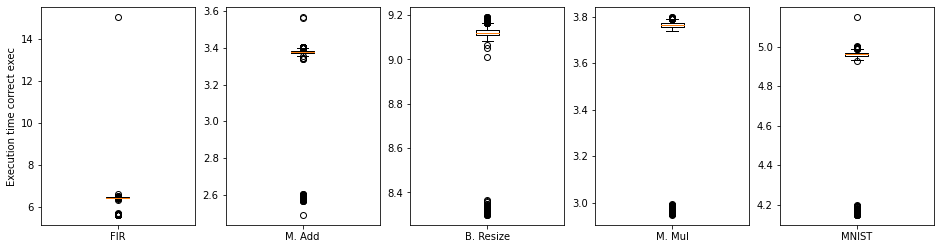

In [9]:
plot_multiple_box(correc_exec, exec_column="execution_time", axis_title="Execution time correct exec", file_name="/tmp/correct_execution.pdf")

In [10]:
correc_exec.groupby(["benchmark"]).describe()

execution_time                                              \
                   count      mean       std     min     25%     50%   
benchmark                                                              
B. Resize         3458.0  9.107905  0.104171  8.2980  9.1084  9.1185   
FIR              10020.0  6.442669  0.128679  5.6259  6.4445  6.4526   
M. Add           12833.0  3.368011  0.093992  2.4903  3.3734  3.3787   
M. Mul            5569.0  3.753202  0.096927  2.9476  3.7578  3.7644   
MNIST             5628.0  4.947929  0.104706  4.1473  4.9537  4.9607   

                              
                75%      max  
benchmark                     
B. Resize  9.131300   9.1905  
FIR        6.460900  15.0280  
M. Add     3.384300   3.5660  
M. Mul     3.771300   3.7977  
MNIST      4.968325   5.1493

/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])


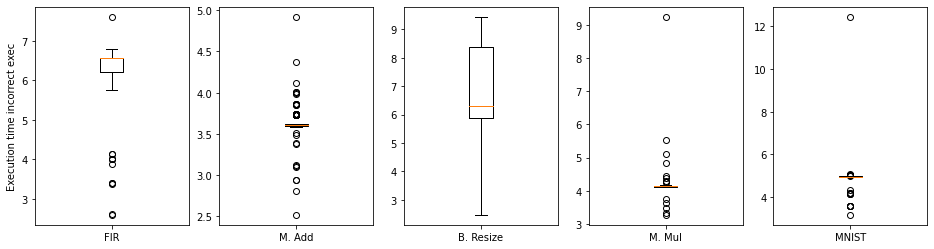

In [11]:
inc_exec = not_correct_exec[not_correct_exec["iteration_time"] < 30]
plot_multiple_box(inc_exec, "iteration_time", "Execution time incorrect exec", "/tmp/incorrect_execution.pdf")

In [12]:
inc_exec[["iteration_time", "benchmark"]].groupby(["benchmark"]).describe()

iteration_time                                                \
                   count      mean       std     min      25%      50%   
benchmark                                                                
B. Resize           13.0  6.378931  2.346535  2.4713  5.87710  6.30560   
FIR                 53.0  5.931328  1.257486  2.5863  6.21000  6.55290   
M. Add             141.0  3.621871  0.230011  2.5158  3.59460  3.60610   
M. Mul              42.0  4.277505  0.867989  3.2710  4.12535  4.13325   
MNIST              363.0  4.944602  0.447797  3.1610  4.95380  4.96040   

                             
               75%      max  
benchmark                    
B. Resize  8.37710   9.4220  
FIR        6.57500   7.5970  
M. Add     3.61690   4.9153  
M. Mul     4.15580   9.2245  
MNIST      4.96835  12.4220

/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])
/tmp/ipykernel_153974/2570393476.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[i].set_xticklabels([b])


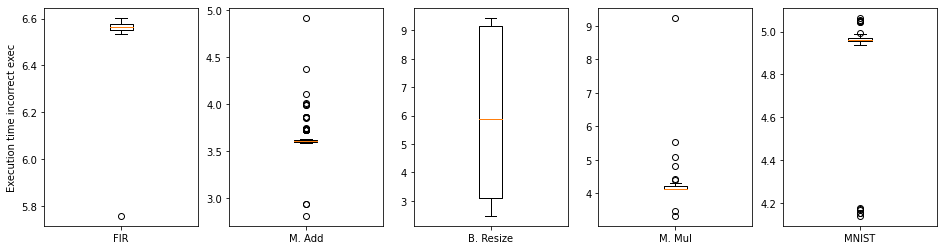

In [16]:
plot_multiple_box(inc_exec[inc_exec["SDC"] == 1], "iteration_time", "Execution time incorrect exec", "/tmp/incorrect_execution.pdf")